<a href="https://colab.research.google.com/github/shaly-ct/AI-and-Machine-Learning/blob/main/Medical_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Definition**

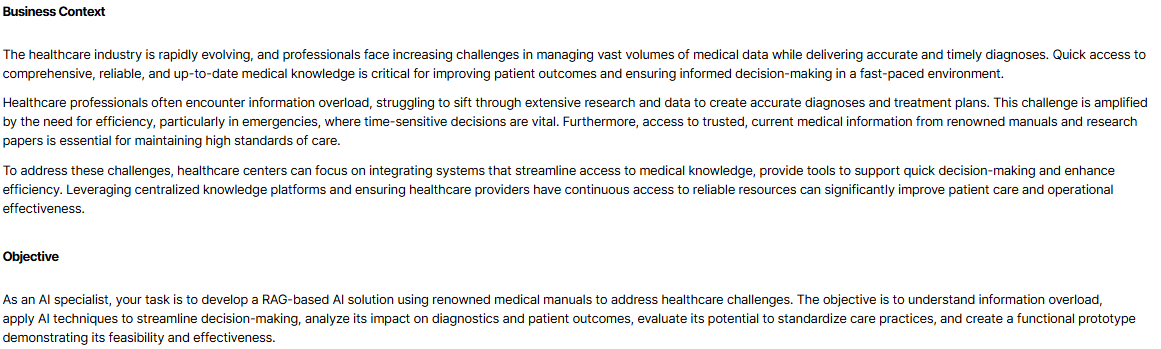

# **Installing Libraries**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS='DLLAMA_CUBLAS=on' FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 MB 349.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 244.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 258.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 316.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 301.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 232.8 MB/s eta 0:00:00


In [ ]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.1 MB

In [ ]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

from huggingface_hub import hf_hub_download
from llama_cpp import Llama

#import google drive
from google.colab import drive
#Mount the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Downloading and loading the LLM**

In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

Downloading the model

In [ ]:
# !huggingface-cli download meta-llama/Meta-Llama-3-8B --include "original/*" --local-dir Meta-Llama-3-8B

In [ ]:
model_name= "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"
model_path = hf_hub_download(
    repo_id=model_name,
    filename=model_basename,
)

Setting up the configurations to the context window, GPU acceleration and batch processing




In [ ]:
#For CPU
llm = Llama(
    model_path=model_path,
    n_ctx=1024,
    n_cores=-2
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

In [ ]:
# #For GPU
# llm = Llama(
#    model_path=model_path,
#  n_ctx=2300,
#   n_gpu_layers=38,
#   n_batch=512
# )

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

In [ ]:
import logging
logging.getLogger('llama').setLevel(logging.ERROR)

Building a function to generate answer from llm

In [ ]:
def generate_response_from_llm(user_prompt):

  #Giving instructions to the llama system
  sys_message = """
  [INST]<<SYS>> Respond to the user question based on user prompts <</SYS>> [/INST]
  """
  prompt = f"{user_prompt}\n{sys_message}"
  response = llm(prompt,
                 max_tokens=128, #maximum number of tokens that the model should generate
                 temperature=0.6, #randomness of the generated response
                 repeat_penalty=1.2, #penalty for repeating tokens in the generated response
                 top_p=5, #diversity of the generated response
                 top_k=3, #maximum number of most-likely next tokens to consider
                 stop=['INST'], # list of tokens that are used to dynamically stop response generation
                 echo=False # input (prompt) to the model should not be returned
                 )

  response_text = response["choices"][0]["text"]
  return response_text

Generate Answers fr\\om LLM for below questions:

---


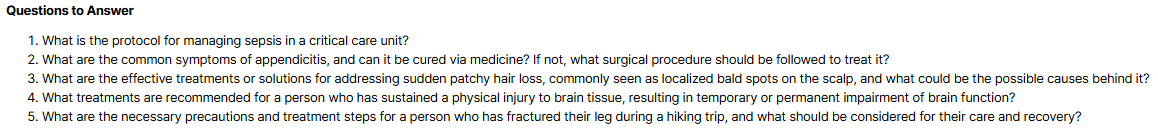

Question 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
#querying llm
user_query= "What is the protocol for managing sepsis in a critical care unit?"
llm_response = generate_response_from_llm(user_query)
print(llm_response)

llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   20355.86 ms /    46 tokens (  442.52 ms per token,     2.26 tokens per second)
llama_perf_context_print:        eval time =  114217.78 ms /   127 runs   (  899.35 ms per token,     1.11 tokens per second)
llama_perf_context_print:       total time =  134722.14 ms /   173 tokens


 In managing sepsis in a critical care unit, the following protocol is generally recommended based on current guidelines from organizations such as the Surviving Sepsis Campaign:

1. Early recognition and suspicion of sepsis: Identify patients who may be at risk for sepsis based on clinical signs and laboratory results (fever or hypothermia, tachycardia or bradycardia, respiratory distress, altered mental status).
2. Rapid administration of antibiotics: Start broad-spectrum intravenous antibiotics as soon as possible after recognition of sepsis based


Question 2: What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
print(generate_response_from_llm('What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'))

Llama.generate: 2 prefix-match hit, remaining 62 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   32617.19 ms /    62 tokens (  526.08 ms per token,     1.90 tokens per second)
llama_perf_context_print:        eval time =  113223.99 ms /   127 runs   (  891.53 ms per token,     1.12 tokens per second)
llama_perf_context_print:       total time =  145983.05 ms /   189 tokens


 Appendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of your abdomen. The common symptoms include:
   1. Sudden pain that starts around your navel and then shifts to your lower right abdomen.
   2. Loss of appetite.
   3. Nausea and vomiting.
   4. Fever, often low-grade at first.
   5. General discomfort or uneasiness.
   In the early stages, appendicitis can sometimes be treated with antibiotics alone


Question 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
print(generate_response_from_llm('What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'))

Llama.generate: 4 prefix-match hit, remaining 64 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   32087.82 ms /    64 tokens (  501.37 ms per token,     1.99 tokens per second)
llama_perf_context_print:        eval time =  110231.07 ms /   127 runs   (  867.96 ms per token,     1.15 tokens per second)
llama_perf_context_print:       total time =  142459.92 ms /   191 tokens


 I. Introduction
   Sudden patchy hair loss, also known as alopecia areata, is a common condition that causes round patches of baldness on the scalp or other areas of the body. The exact cause of this condition is unknown, but it's believed to be an autoimmune disease where the immune system mistakenly attacks hair follicles.

   II. Effective Treatments for Alopecia Areata
   1. Topical treatments: Minoxidil (Rogaine) or corticosteroid creams and ointments can help stimulate hair growth in


Question 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
print(generate_response_from_llm('What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'))

Llama.generate: 2 prefix-match hit, remaining 58 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   28422.88 ms /    58 tokens (  490.05 ms per token,     2.04 tokens per second)
llama_perf_context_print:        eval time =  116564.24 ms /   127 runs   (  917.83 ms per token,     1.09 tokens per second)
llama_perf_context_print:       total time =  145133.71 ms /   185 tokens


 Based on the user's question, it appears they are asking about treatments for traumatic brain injuries (TBIs). The specific treatment recommended can vary greatly depending on the severity and location of the injury. Here are some common interventions:
   1. Emergency care: For severe TBIs, immediate medical attention is crucial to prevent further damage or complications. This may include surgery to remove hematomas (clots) or repair skull fractures, as well as medications to manage swelling and maintain brain function.
    2. Rehabilitation therapy: Many people with TBIs require rehabil


Question 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
print(generate_response_from_llm('What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'))

Llama.generate: 2 prefix-match hit, remaining 65 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   30528.96 ms /    65 tokens (  469.68 ms per token,     2.13 tokens per second)
llama_perf_context_print:        eval time =  114012.33 ms /   127 runs   (  897.73 ms per token,     1.11 tokens per second)
llama_perf_context_print:       total time =  144686.16 ms /   192 tokens


1. Assess the Situation:
   - Check if the hiker is in a safe location and not in danger of further injury or exposure to extreme weather conditions.
   - Ensure that you have called for medical help, if necessary.

 2. Secure the Fractured Leg:
   - Do not try to move the person with a fractured leg unless it is absolutely necessary, as this could cause more harm.
   - Use a splint or other immobilizing device to keep the leg stable and prevent any movement that may worsen the injury.
   - If available, apply


##### Obeservations:



*  The llm has provided somewhat relevant answers to the questions.
*   The answer is very generic and not very precise.




# Fine tuning LLM ans apply prompt engineering

LLM 2: increase token to 512 and update the system prompt

In [ ]:
def generate_response_from_llm2(user_prompt):

  #Giving instructions to the llama system
  sys_message = """
  [INST]<<SYS>> Respond to the user question based on user prompts like a Medical assistant<</SYS>> [/INST]
  """
  prompt = f"{user_prompt}\n{sys_message}"
  response = llm(prompt,
                 max_tokens=512, #maximum number of tokens that the model should generate
                 temperature=0.6, #randomness of the generated response
                 repeat_penalty=1.2, #penalty for repeating tokens in the generated response
                 top_p=5, #diversity of the generated response
                 top_k=3, #maximum number of most-likely next tokens to consider
                 stop=['INST'], # list of tokens that are used to dynamically stop response generation
                 echo=False # input (prompt) to the model should not be returned
                 )

  response_text = response["choices"][0]["text"]
  return response_text

Question 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
#querying llm
user_query= "What is the protocol for managing sepsis in a critical care unit?"
llm_response = generate_response_from_llm2(user_query)
print(llm_response)

Llama.generate: 2 prefix-match hit, remaining 48 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   22492.46 ms /    48 tokens (  468.59 ms per token,     2.13 tokens per second)
llama_perf_context_print:        eval time =  471041.50 ms /   511 runs   (  921.80 ms per token,     1.08 tokens per second)
llama_perf_context_print:       total time =  494334.17 ms /   559 tokens


 In a critical care unit, managing sepsis involves a swift and coordinated response to prevent progression of the condition and minimize organ damage. Here is an outline of the standard protocol:

1. Early Recognition: Suspect sepsis in any patient with suspected or confirmed infection who has signs of organ dysfunction using the Sequential [Sepsis-related] Organ Failure Assessment (SOFA) score, Quick Sequential [Sepsis-related] Organ Failure Assessment (qSOFA), or other clinical scoring systems.

2. Initial Resuscitation: Administer high-flow oxygen via a non-rebreather mask to maintain SpO2 > 96%. Start intravenous access with two large bore catheters, and initiate fluid resuscitation with crystalloids up to 30 mL/kg over the first hour. Monitor hemodynamic response closely.

3. Antibiotic Administration: Begin broad-spectrum antibiotics based on suspected infection source as soon as possible. Adjust therapy according to culture and sensitivity results.

4. Source Control: Identify a

Question 2: What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
print(generate_response_from_llm2('What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'))

Llama.generate: 2 prefix-match hit, remaining 66 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   32540.53 ms /    66 tokens (  493.04 ms per token,     2.03 tokens per second)
llama_perf_context_print:        eval time =  341598.06 ms /   354 runs   (  964.97 ms per token,     1.04 tokens per second)
llama_perf_context_print:       total time =  374662.28 ms /   420 tokens


 appendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right part of your abdomen. The symptoms can vary from person to person but often include:

1. Abdominal pain, usually starting around the navel and then shifting to the lower right side.
2. Loss of appetite
3. Nausea and vomiting
4. Fever, sometimes with chills
5. General discomfort or uneasiness
6. Constipation or diarrhea

In most cases, appendicitis cannot be cured via medicine alone because the inflammation can lead to the appendix bursting (perforating), which could cause infection in the abdominal cavity and potentially life-threatening complications. If you suspect appendicitis or have persistent symptoms, seek medical attention immediately for proper diagnosis and treatment.

The standard surgical procedure used to treat appendicitis is called an appendectomy. During this minimally invasive surgery, the surgeon removes your inflamed appendix while 

Question 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
print(generate_response_from_llm2('What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'))

Llama.generate: 4 prefix-match hit, remaining 68 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   32515.56 ms /    68 tokens (  478.17 ms per token,     2.09 tokens per second)
llama_perf_context_print:        eval time =  391647.73 ms /   441 runs   (  888.09 ms per token,     1.13 tokens per second)
llama_perf_context_print:       total time =  424826.22 ms /   509 tokens


 I'd be happy to help answer your question about sudden patchy hair loss. This condition, also known as alopecia areata, is an autoimmune disease that causes hair loss in small patches on the scalp or other areas of the body. The exact cause is unknown but it may involve a problem with the immune system attacking the hair follicles. Other possible triggers include stress, genetics, and viral infections.

   There are several treatments for alopecia areata that can help stimulate new hair growth:
   1) Corticosteroids: These medications can be applied directly to the affected area or taken orally to reduce inflammation and suppress the immune system's attack on the hair follicles. Topical applications include foams, lotions, gels, solutions, or injections. Oral corticosteroids may also be prescribed for more extensive hair loss.
   2) Minoxidil: This medication is applied topically to stimulate hair growth and increase blood flow to the follicles. It can take several months to see resul

Question 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
print(generate_response_from_llm2('What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'))

Llama.generate: 2 prefix-match hit, remaining 62 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   29400.00 ms /    62 tokens (  474.19 ms per token,     2.11 tokens per second)
llama_perf_context_print:        eval time =  399936.35 ms /   435 runs   (  919.39 ms per token,     1.09 tokens per second)
llama_perf_context_print:       total time =  430002.19 ms /   497 tokens


Based on your description, it sounds like you're asking about treatments for a brain injury that has resulted in temporary or permanent impairment of brain function. Brain injuries can range from mild to severe and require individualized treatment plans. Here are some common interventions:

1. Rest and Rehabilitation: The first step is usually rest, which allows the brain time to heal. Depending on the severity of the injury, rehabilitation may be necessary. This could include physical therapy for motor skills, occupational therapy for daily living tasks, speech-language therapy for communication issues, or cognitive rehabilitation to address memory and attention problems.

2. Medications: Various medications can help manage symptoms associated with brain injuries such as pain, seizures, depression, anxiety, sleep disturbances, and inattention. Consult a healthcare professional for appropriate medication options.

3. Surgery: In some cases, surgery might be required to remove hematomas

Question 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
print(generate_response_from_llm2('What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'))

Llama.generate: 2 prefix-match hit, remaining 69 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   36242.42 ms /    69 tokens (  525.25 ms per token,     1.90 tokens per second)
llama_perf_context_print:        eval time =  398577.41 ms /   438 runs   (  909.99 ms per token,     1.10 tokens per second)
llama_perf_context_print:       total time =  435490.98 ms /   507 tokens


 I'm here to help answer your question, but please keep in mind that I'm an AI language model and not a medical professional. However, I can provide you with some general information on the topic based on available resources.

   If someone has fractured their leg while hiking, it is crucial to remain calm and assess the situation carefully. Here are some necessary precautions:

   1. Do not move the person excessively as movement could worsen the injury or cause further complications such as nerve damage or increased bleeding.
    2. Apply a splint or immobilize the injured leg using available materials, such as branches, clothes, or hiking poles, to prevent any unnecessary motion and help reduce pain. Make sure not to apply too much pressure on the injury site while securing the splint.
   3. Keep the person warm by covering them with a blanket or jacket if necessary. Hypothermia can worsen their condition.
    4. If possible, call for emergency medical assistance and provide them wi

##Observations


*   After updating prompts and increasing token size, the model has improvised
*   It has given clear response much similar to medical assistants as mentioned in the prompt.



LLM 3: reduced temperature to 0.3 and update the system prompt similar to few-shot prompting

In [ ]:
def generate_response_from_llm3(user_prompt):

  #Giving instructions to the llama system
  sys_message = """
  [INST]<<SYS>> Respond to the user question based on user prompts like a Medical professional in the below format,

  Illness: Name of the illness
  Remedy: Remedy for the illness
  Other queries: Answer for any other questions mentioned in the user prompt.
  <</SYS>> [/INST]
  """
  prompt = f"{user_prompt}\n{sys_message}"
  response = llm(prompt,
                 max_tokens=512, #maximum number of tokens that the model should generate
                 temperature=0.3, #randomness of the generated response
                 repeat_penalty=1.2, #penalty for repeating tokens in the generated response
                 top_p=5, #diversity of the generated response
                 top_k=3, #maximum number of most-likely next tokens to consider
                 stop=['INST'], # list of tokens that are used to dynamically stop response generation
                 echo=False # input (prompt) to the model should not be returned
                 )

  response_text = response["choices"][0]["text"]
  return response_text

Question 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
#querying llm
user_query= "What is the protocol for managing sepsis in a critical care unit?"
llm_response = generate_response_from_llm3(user_query)
print(llm_response)

Llama.generate: 2 prefix-match hit, remaining 91 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   43120.39 ms /    91 tokens (  473.85 ms per token,     2.11 tokens per second)
llama_perf_context_print:        eval time =  332069.47 ms /   381 runs   (  871.57 ms per token,     1.15 tokens per second)
llama_perf_context_print:       total time =  375725.07 ms /   472 tokens


Illness: Sepsis is a life-threatening condition caused by the body's response to an infection, which can lead to tissue damage and organ failure.
   
  Remedy: The management of sepsis in a critical care unit involves early recognition, prompt administration of antibiotics, fluid resuscitation, and supportive measures to maintain vital organ function. This may include mechanical ventilation for respiratory support, vasopressors for blood pressure control, renal replacement therapy for kidney failure, and other interventions as needed.
   
  Other queries:

  User: What are the signs of sepsis?
  <</SYS>> The signs of sepsis can include fever or hypothermia, rapid heart rate, increased respiratory rate, confusion or altered mental status, and low blood pressure. In some cases, there may be symptoms related to the source of infection, such as abdominal pain or difficulty breathing.

  User: How is sepsis diagnosed?
  <</SYS>> Sepsis is typically diagnosed based on clinical signs and labo

Question 2: What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
print(generate_response_from_llm3('What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'))

Llama.generate: 2 prefix-match hit, remaining 109 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   51551.89 ms /   109 tokens (  472.95 ms per token,     2.11 tokens per second)
llama_perf_context_print:        eval time =  222906.30 ms /   257 runs   (  867.34 ms per token,     1.15 tokens per second)
llama_perf_context_print:       total time =  274785.55 ms /   366 tokens


Illness: Appendicitis
  Remedy: Appendicitis is typically treated with surgery, specifically an appendectomy. This procedure involves removing the inflamed appendix to prevent it from rupturing and causing further complications. In some cases where the appendicitis is caught very early and the appendix is not too swollen, antibiotics may be used instead of surgery to allow the appendix to heal on its own. However, this approach carries a higher risk of complications such as recurrence or rupture if the diagnosis was incorrect or if the infection worsens despite treatment.
  Other queries: The common symptoms of appendicitis include abdominal pain (usually starting around the navel and moving to the lower right side), loss of appetite, vomiting, fever, constipation or diarrhea, and a feeling of being ill in general. If you experience any of these symptoms, it is important to seek medical attention promptly as appendicitis can lead to serious complications if left untreated.
  
  Note: T

Question 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
print(generate_response_from_llm3('What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'))

Llama.generate: 4 prefix-match hit, remaining 111 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   52031.87 ms /   111 tokens (  468.76 ms per token,     2.13 tokens per second)
llama_perf_context_print:        eval time =  413009.30 ms /   474 runs   (  871.33 ms per token,     1.15 tokens per second)
llama_perf_context_print:       total time =  465717.61 ms /   585 tokens


Illness: Sudden patchy hair loss, also known as alopecia areata or spot baldness.
  Remedy: There is no guaranteed cure for alopecia areata, but several treatments can help stimulate hair regrowth and prevent further hair loss. These include:
   1. Topical corticosteroids: Applied directly to the affected area, these medications reduce inflammation and suppress the immune system response that causes hair loss.
   2. Injections of corticosteroids or other immunomodulators: Regular injections into the bald spots can help stimulate hair regrowth by reducing inflammation and altering the immune response.
   3. Minoxidil (Rogaine): A topical medication that promotes hair growth, it is most effective when used early in the disease process.
   4. DHT blockers: Finasteride or dutasteride can help slow down hair loss by blocking dihydrotestosterone (DHT), a hormone linked to male pattern baldness and alopecia areata.
   Other queries:
   Q: What causes sudden patchy hair loss?
   A: The exact c

Question 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
print(generate_response_from_llm3('What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'))

Llama.generate: 2 prefix-match hit, remaining 105 prompt tokens to eval
llama_perf_context_print:        load time =   20357.42 ms
llama_perf_context_print: prompt eval time =   49054.12 ms /   105 tokens (  467.18 ms per token,     2.14 tokens per second)
llama_perf_context_print:        eval time =  394968.70 ms /   435 runs   (  907.97 ms per token,     1.10 tokens per second)
llama_perf_context_print:       total time =  444676.09 ms /   540 tokens


 Illness: Brain injury resulting in temporary or permanent impairment of brain function
   
   Remedy: The treatment for a brain injury can vary depending on the severity and location of the injury. In acute cases, medical intervention is necessary to ensure the patient's vital signs are stable and they receive appropriate care to prevent further damage. This may include surgery if there is an intracranial hemorrhage or hematoma, intensive care unit (ICU) monitoring, and medications to manage symptoms such as seizures or increased intracranial pressure.
   
   Rehabilitation is a crucial component of treatment for brain injuries, which may include physical therapy, occupational therapy, speech-language therapy, cognitive rehabilitation, and behavioral management techniques. These therapies aim to help the patient regain lost skills, compensate for impairments, and improve overall functioning.
   
   Other queries:
    
   User: What are some common causes of brain injuries?
   
   <</S

Question 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
print(generate_response_from_llm3('What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'))

llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   69919.21 ms /   114 tokens (  613.33 ms per token,     1.63 tokens per second)
llama_perf_context_print:        eval time =  346683.82 ms /   338 runs   ( 1025.69 ms per token,     0.97 tokens per second)
llama_perf_context_print:       total time =  417113.06 ms /   452 tokens


 Illness: Leg Fracture
    Remedy: The first step for someone with a suspected leg fracture during a hiking trip is to immobilize the affected limb using a makeshift splint, such as a stick or trekking pole. This will help prevent further injury and provide some comfort. If possible, elevate the injured leg above heart level to reduce swelling. Seek emergency medical assistance as soon as you can reach civilization.
    Other queries:
    1) Pain relief: Over-the-counter pain medications like acetaminophen or ibuprofen may be taken for managing discomfort before reaching a hospital, but avoid aspirin and other blood thinners due to potential complications with surgery if required.
    2) Signs of severe injury: If the person is unable to walk, has extreme swelling, deformity, numbness or loss of sensation in the leg, uncontrollable bleeding, or signs of shock (pale, clammy skin; rapid heartbeat), these may indicate a more serious fracture and require immediate medical attention.
    3)

Observations:

*   The LLM has followed the few-short prompty perfectly
*   It has also listed some questions with answers around the user promt.
*   The LLM seems to grasp our requirements and answer with the given template.



LLM 4: reduced top_p to 3 and update the system prompt

In [ ]:
def generate_response_from_llm4(user_prompt):

  #Giving instructions to the llama system
  sys_message = """
  [INST]<<SYS>> Respond to the user question based on user prompts like a explaining to a school student.
  <</SYS>> [/INST]
  """
  prompt = f"{user_prompt}\n{sys_message}"
  response = llm(prompt,
                 max_tokens=512, #maximum number of tokens that the model should generate
                 temperature=0.3, #randomness of the generated response
                 repeat_penalty=1.2, #penalty for repeating tokens in the generated response
                 top_p=3, #diversity of the generated response
                 top_k=3, #maximum number of most-likely next tokens to consider
                 stop=['INST'], # list of tokens that are used to dynamically stop response generation
                 echo=False # input (prompt) to the model should not be returned
                 )

  response_text = response["choices"][0]["text"]
  return response_text

Question 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
#querying llm
user_query= "What is the protocol for managing sepsis in a critical care unit?"
llm_response = generate_response_from_llm4(user_query)
print(llm_response)

Llama.generate: 2 prefix-match hit, remaining 54 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   32000.74 ms /    54 tokens (  592.61 ms per token,     1.69 tokens per second)
llama_perf_context_print:        eval time =  534962.31 ms /   511 runs   ( 1046.89 ms per token,     0.96 tokens per second)
llama_perf_context_print:       total time =  567873.87 ms /   565 tokens


Hello there! I'd be happy to help explain the protocol for managing sepsis in a critical care unit, but let me first clarify what sepsis is. Sepsis is a serious condition that can occur when your body has an extreme response to an infection. It can lead to tissue damage and organ failure if not treated promptly and effectively.

  Now, let's talk about how we manage sepsis in a critical care unit:

   1. Recognition: The first step is recognizing the signs of sepsis as early as possible. These can include fever or shivering, rapid heartbeat, fast breathing, low blood pressure, confusion or disorientation, and decreased urine output. If any of these symptoms are present, healthcare providers will assess for sepsis.

   2. Initial resuscitation: Once sepsis is suspected, the first priority is to stabilize the patient's vital signs through what we call "resuscitation." This may include giving oxygen through a mask or tube, starting an intravenous line (IV) to administer fluids and medicat

Question 2: What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
print(generate_response_from_llm4('What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'))

Llama.generate: 2 prefix-match hit, remaining 72 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   42697.67 ms /    72 tokens (  593.02 ms per token,     1.69 tokens per second)
llama_perf_context_print:        eval time =  396843.88 ms /   383 runs   ( 1036.15 ms per token,     0.97 tokens per second)
llama_perf_context_print:       total time =  440171.39 ms /   455 tokens


 Appendicitis is a medical condition where your appendix, which is a small pouch connected to your large intestine in the lower right side of your abdomen, becomes inflamed and swells. This can be caused by a blockage in the appendix that prevents waste from passing through it.

   The common symptoms of appendicitis include:
   1. Pain around your navel or belly button area that may move to your lower right side. It might feel like a cramp at first, but it can become constant and severe over time.
    2. Loss of appetite and feeling sick to your stomach (nausea). You might also vomit.
    3. Fever, which may start before or after the belly pain.
    4. A decrease in urine output due to pressure on the bladder from an enlarged appendix.
   5. Constipation or diarrhea.

   Appendicitis is usually treated with surgery because if left untreated, the appendix can burst and release infectious materials into your abdominal cavity, which could lead to a serious condition called peritonitis. T

Question 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
print(generate_response_from_llm4('What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'))

Llama.generate: 4 prefix-match hit, remaining 74 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   42768.96 ms /    74 tokens (  577.96 ms per token,     1.73 tokens per second)
llama_perf_context_print:        eval time =  545931.48 ms /   511 runs   ( 1068.36 ms per token,     0.94 tokens per second)
llama_perf_context_print:       total time =  589654.36 ms /   585 tokens


Hi there! You've asked about sudden patchy hair loss, which can look like bald spots on the scalp. I'd be happy to help answer your question.

  First, let me explain that everyone loses some hair every day as part of a normal cycle. But when we talk about patchy hair loss, it means losing larger clumps of hair in certain areas than what is typical. This can be quite concerning, but there are several possible causes for this type of hair loss.

  1) Alopecia Areata: This condition causes round patches of baldness on the scalp or other parts of the body. It happens when your immune system attacks the hair follicles, causing them to stop producing new hairs. In most cases, alopecia areata is not permanent and hair regrows after a few months.

  2) Traction Alopecia: This type of hair loss occurs due to pulling or tension on the hair roots. It's often seen in people who wear tight braids, ponytails, or extensions for an extended period. When the pressure is removed from the affected area,

Question 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
print(generate_response_from_llm4('What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'))

Llama.generate: 2 prefix-match hit, remaining 68 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   39895.81 ms /    68 tokens (  586.70 ms per token,     1.70 tokens per second)
llama_perf_context_print:        eval time =  417511.77 ms /   404 runs   ( 1033.44 ms per token,     0.97 tokens per second)
llama_perf_context_print:       total time =  458101.77 ms /   472 tokens


 If someone has an injury to their brain tissue, it's important that they receive proper medical attention right away. Depending on the severity of the injury and its impact on brain function, different treatments may be recommended:

1. Rest and Recovery: For mild injuries like concussions, rest is often the best treatment. This means avoiding physical activity or mental tasks that might strain the brain until it has had a chance to heal.
2. Medications: Doctors might prescribe medications to help manage symptoms such as pain, swelling in the brain (edema), seizures, or depression and anxiety.
3. Rehabilitation Therapies: For more severe injuries, rehabilitation therapies may be necessary to help restore lost functions. These can include physical therapy for motor skills, speech-language therapy for communication abilities, occupational therapy for daily living tasks, and cognitive rehabilitation for memory, attention, and problem solving skills.
4. Surgery: In some cases, surgery mig

Question 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
print(generate_response_from_llm4('What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'))

Llama.generate: 2 prefix-match hit, remaining 75 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   44062.02 ms /    75 tokens (  587.49 ms per token,     1.70 tokens per second)
llama_perf_context_print:        eval time =  546861.34 ms /   511 runs   ( 1070.18 ms per token,     0.93 tokens per second)
llama_perf_context_print:       total time =  591828.85 ms /   586 tokens


 If you or someone with you has fractured their leg while hiking, it's important to stay calm and follow these steps:
   1. **Assess the situation:** Try to determine if the fracture is open (compound) or closed (simple). An open fracture means that the bone has broken through the skin. This can increase the risk of infection, so it requires more urgent attention. If you're unsure about the type of fracture, try not to move the leg too much and cover it with a clean cloth if possible.
   2. **Call for help:** Use your cell phone or other communication device to call emergency services (911 in many countries) or hike back to where you can get reception. If there's no signal, try to find someone who can assist you in getting medical attention as soon as possible.
   3. **Provide first aid:** Try to keep the person comfortable by keeping them still and elevating their leg if possible. Use a splint or other materials available to immobilize the fractured area without causing too much disco

Observation:


*   The LLM has responded in simple terms which are easy to understand
*   The LLM has been faithful to the context. It has not deviated from the topic



**LLM 5: increased max_tokens to 1024, temperature to 0.1, top_p=5, top_k=1 and update the system prompt to basic prompt style**

In [ ]:
def generate_response_from_llm5(user_prompt):

  #Giving instructions to the llama system
  sys_message = """
  [INST]<<SYS>> Respond to the user question based on user prompts in not more than 150 words.
  <</SYS>> [/INST]
  """
  prompt = f"{user_prompt}\n{sys_message}"
  response = llm(prompt,
                 max_tokens=1024, #maximum number of tokens that the model should generate
                 temperature=0.1, #randomness of the generated response
                 repeat_penalty=1.2, #penalty for repeating tokens in the generated response
                 top_p=5, #diversity of the generated response
                 top_k=1, #maximum number of most-likely next tokens to consider
                 stop=['INST'], # list of tokens that are used to dynamically stop response generation
                 echo=False # input (prompt) to the model should not be returned
                 )

  response_text = response["choices"][0]["text"]
  return response_text

Question 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
#querying llm
user_query= "What is the protocol for managing sepsis in a critical care unit?"
llm_response = generate_response_from_llm5(user_query)
print(llm_response)

Llama.generate: 2 prefix-match hit, remaining 56 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   33758.19 ms /    56 tokens (  602.82 ms per token,     1.66 tokens per second)
llama_perf_context_print:        eval time =  205776.61 ms /   201 runs   ( 1023.76 ms per token,     0.98 tokens per second)
llama_perf_context_print:       total time =  239830.53 ms /   257 tokens


1. Recognize and suspect sepsis early based on clinical suspicion, laboratory findings (elevated white blood cell count, lactate), and vital sign instability.
  2. Initiate resuscitation with intravenous fluids to maintain adequate tissue perfusion and organ function.
  3. Administer broad-spectrum antibiotics as soon as possible based on suspected infection source and local microbiology data.
  4. Provide appropriate supportive care, including oxygen therapy, vasopressors for blood pressure support, and mechanical ventilation if needed.
  5. Monitor closely for organ dysfunction using Sequential Organ Failure Assessment (SOFA) score or other clinical tools.
  6. Consider early consultation with intensive care unit specialists and/or infectious disease experts as appropriate.
  7. Provide source control measures, such as surgical debridement or drainage, if indicated to address the underlying infection.


Question 2: What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
print(generate_response_from_llm5('What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'))

Llama.generate: 2 prefix-match hit, remaining 74 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   43614.03 ms /    74 tokens (  589.38 ms per token,     1.70 tokens per second)
llama_perf_context_print:        eval time =  169763.48 ms /   165 runs   ( 1028.87 ms per token,     0.97 tokens per second)
llama_perf_context_print:       total time =  213606.25 ms /   239 tokens


 Appendicitis is a medical condition characterized by inflammation of the appendix, often causing pain in the lower right abdomen. Common symptoms include loss of appetite, nausea and vomiting, fever, general discomfort or uneasiness, and sometimes a feeling of bloating or swelling in the abdomen. Severe cramps or tenderness may also be present upon physical examination of the area.
   Appendicitis cannot typically be cured with medicine alone as it requires surgical intervention to remove the inflamed appendix before it ruptures and potentially spreads infection throughout the body. The most common procedure for treating appendicitis is an appendectomy, which can be performed laparoscopically or through a larger incision depending on the severity of the case.


Question 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
print(generate_response_from_llm5('What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'))

Llama.generate: 4 prefix-match hit, remaining 76 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   44433.18 ms /    76 tokens (  584.65 ms per token,     1.71 tokens per second)
llama_perf_context_print:        eval time =  160525.63 ms /   149 runs   ( 1077.35 ms per token,     0.93 tokens per second)
llama_perf_context_print:       total time =  205168.27 ms /   225 tokens


 Sudden patchy hair loss, also known as alopecia areata, can be distressing. Treatment options include:
   1. Topical treatments like minoxidil or corticosteroids applied directly to the affected area.
   2. Injections of corticosteroids into the bald spot.
   3. Systemic medications such as immunosuppressants, which can help prevent further hair loss and promote regrowth.
   4. Light therapy using lasers or LEDs.
   Possible causes include autoimmune disorders, stress, genetics, or viral infections. It's essential to consult a healthcare professional for an accurate diagnosis and appropriate treatment plan.


Question 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
print(generate_response_from_llm5('What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'))

Llama.generate: 2 prefix-match hit, remaining 70 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   41602.35 ms /    70 tokens (  594.32 ms per token,     1.68 tokens per second)
llama_perf_context_print:        eval time =  161363.29 ms /   158 runs   ( 1021.29 ms per token,     0.98 tokens per second)
llama_perf_context_print:       total time =  203177.84 ms /   228 tokens


 Treatment for a brain injury depends on the severity and location of the damage. For mild injuries, rest, hydration, and over-the-counter pain relievers may be sufficient. More severe injuries might require hospitalization, surgery, or rehabilitation. Rehabilitation therapies such as physical therapy, occupational therapy, speech therapy, and cognitive rehabilitation can help improve function and compensate for impairments. Medications like anti-seizure drugs, steroids, and psychostimulants may also be prescribed to manage symptoms or promote brain healing. In some cases, assistive devices or technology might be necessary to support daily living activities. It's essential to consult a healthcare professional for an accurate diagnosis and personalized treatment plan.


Question 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
print(generate_response_from_llm5('What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'))

Llama.generate: 2 prefix-match hit, remaining 77 prompt tokens to eval
llama_perf_context_print:        load time =   69921.40 ms
llama_perf_context_print: prompt eval time =   45067.71 ms /    77 tokens (  585.29 ms per token,     1.71 tokens per second)
llama_perf_context_print:        eval time =  207447.68 ms /   201 runs   ( 1032.08 ms per token,     0.97 tokens per second)
llama_perf_context_print:       total time =  252798.62 ms /   278 tokens


1. Assess the severity: Check if it's an open or closed fracture, and assess for signs of nerve damage or impaired circulation.
  2. Immobilize the leg: Use a splint or sling to prevent further movement and reduce pain.
  3. Control bleeding: Apply direct pressure with a clean cloth if necessary.
  4. Seek medical help: If possible, contact emergency services for evacuation. Otherwise, make your way back to civilization as soon as you can.
  5. Provide comfort: Keep the injured person warm and hydrated during transport.
  6. Follow doctor's instructions: Once you reach a hospital or healthcare professional, follow their recommended treatment plan, which may include surgery, casting, or physical therapy.
  7. Encourage rest and recovery: Allow ample time for healing, and help the person maintain a healthy diet and regular exercise routine once they are able to do so.


Observation:


*   The LLM has provided content fairly well
*   The LLM is able to provided a high level answer for the questions



#Data Preparation for RAG

Retrieve the pdf document

In [ ]:
#Load the pdf
pdf_path = '/content/drive/MyDrive/RAG/medical_diagnosis_manual.pdf'
pdf_loader = PyMuPDFLoader(pdf_path)
med_doc = pdf_loader.load()

In [ ]:
#print first 3 page content
for i in range(3):
  print('Page Number = ',i+1,end='\n')
  print(med_doc[i].page_content,end='\n')

Page Number =  1
shalynpraise@gmail.com
Y2RBPE5RKN
ant for personal use by shalynpraise@g
shing the contents in part or full is liable 

Page Number =  2
shalynpraise@gmail.com
Y2RBPE5RKN
This file is meant for personal use by shalynpraise@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.

Page Number =  3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ....................................................................................................................................................................................

In [ ]:
#get number of pages
len(med_doc)

4114

There are 4114 pages in the document

## Data Chunking

In [ ]:
#setting up text splitter for chunking
text_splitter_ = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512,
    chunk_overlap=20
)

In [ ]:
#get the chunk
new_var = pdf_loader.load_and_split(text_splitter=text_splitter_)
text_chunk = new_var

In [ ]:
#print thu number of chunks
print(len(text_chunk))

8469


There are 8469 chunks

## Embedding

In [ ]:
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')

## Vector Database

In [ ]:
#Creating a vector database
out_dir = "medical_db"
if not os.path.exists(out_dir):
  os.makedirs(out_dir)


In [ ]:
#generating embedding to vector db
med_vector = Chroma.from_documents(
    text_chunk,
    embedding_model,
    persist_directory=out_dir
)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [ ]:
med_vector.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='thenlper/gte-large', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [ ]:
med_vector.similarity_search("Asthma",k=2)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


[Document(page_content='Chapter 191. Asthma\nIntroduction\nAsthma is a disease of diffuse airway inflammation caused by a variety of triggering stimuli\nresulting in partially or completely reversible bronchoconstriction. Symptoms and signs include\ndyspnea, chest tightness, cough, and wheezing. The diagnosis is based on history, physical\nexamination, and pulmonary function tests. Treatment involves controlling triggering factors\nand drug therapy, most commonly with inhaled β2-agonists and inhaled corticosteroids.\nPrognosis is good with treatment.\nEpidemiology\nThe prevalence of asthma has increased continuously since the 1970s, and it now affects an estimated 4\nto 7% of people worldwide. More than 20 million people in the US are affected. Asthma is one of the most\ncommon chronic diseases of childhood, affecting more than 6 million children; it occurs more frequently in\nboys before puberty and in girls after puberty. It also occurs more frequently in blacks and Puerto Ricans.\nD

## Retriever

In [ ]:
## generating Retriever
retriever = med_vector.as_retriever(
    search_type='similarity',
    search_kwargs={'k':2}
)

Creating a system promt and user prompt

In [ ]:
#set system prompt
sys_prompt = """
You are a medical assistant. Your role is to provide appropriate answers from the context.
The user input will have the relavant context required to answer the questions.
The context will begin with ###Context.
The context contains relevant information to answer the questions.
The user questions begin with ###question.
Answer only using the relavant information in the context. Do not add the context information in the response.
If the answer is not available in the context, respond "I don't know".
"""

In [ ]:
#set user prompt
user_promt = """"
###Context
Here are some documents relevant to the questions mentioned below:
{context}
###question
{question}
"""


Creating a response function

In [ ]:
# #For GPU
llm = Llama(
   model_path=model_path,
 n_ctx=2300,
  n_gpu_layers=38,
  n_batch=512
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

In [ ]:
def generate_RAG_response(user_query, k=2, max_tokens=128,top_p=0.9,top_k=10,temperature=0.01):
  global sys_prompt, user_promt
  #retrieve relevant document chunks
  relevant_doc_chunks = retriever.get_relevant_documents(query=user_query,k=k)
  context_list = [doc.page_content for doc in relevant_doc_chunks]

  #combine relevant document
  context_text_for_prompt = ". ".join(context_list)

  #generate prompt
  user_message = user_promt.replace('{context}',context_text_for_prompt)
  user_message = user_message.replace('{question}',user_query)

  prompt= sys_prompt+ '\n' + user_message

  #generate_response
  try:
    response = llm(
        prompt=prompt,
        max_tokens=max_tokens,
        temperature= temperature,
        top_p=top_p,
        top_k=top_k,
        )
    response = response['choices'][0]['text'].strip()
  except Exception as e:
      response = f'Sorry I encountered the below exception: \n {e}'

  return response




#Question Answering using RAG

Question 1

In [ ]:
user_input='What is the protocol for managing sepsis in a critical care unit?'
print(generate_RAG_response(user_input))

llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  616645.59 ms /  1297 tokens (  475.44 ms per token,     2.10 tokens per second)
llama_perf_context_print:        eval time =  122523.54 ms /   127 runs   (  964.75 ms per token,     1.04 tokens per second)
llama_perf_context_print:       total time =  739246.85 ms /  1424 tokens


The protocol involves administering antibiotics as soon as sepsis is suspected. The initial regimen includes gentamicin or tobramycin 5.1 mg/kg IV once/day and a 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day). If Pseudomonas is suspected, ceftazidime 2 g IV q 8 h should be used instead. Vancomycin must be added if resistant staphylococci or


Question 2

In [ ]:
user_input = 'What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'
print(generate_RAG_response(user_input))

Llama.generate: 128 prefix-match hit, remaining 926 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  432886.32 ms /   926 tokens (  467.48 ms per token,     2.14 tokens per second)
llama_perf_context_print:        eval time =   47491.70 ms /    50 runs   (  949.83 ms per token,     1.05 tokens per second)
llama_perf_context_print:       total time =  480411.89 ms /   976 tokens


The common symptoms of appendicitis include abdominal pain, anorexia, and abdominal tenderness. Appendicitis cannot be cured via medicine alone, and the surgical procedure to treat it is appendectomy.


Question 3

In [ ]:
user_input = 'What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'
print(generate_RAG_response(user_input))

Llama.generate: 128 prefix-match hit, remaining 991 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  480608.46 ms /   991 tokens (  484.97 ms per token,     2.06 tokens per second)
llama_perf_context_print:        eval time =  108515.44 ms /   116 runs   (  935.48 ms per token,     1.07 tokens per second)
llama_perf_context_print:       total time =  589191.21 ms /  1107 tokens


Based on the context, the possible causes for sudden patchy hair loss could be alopecia areata. The effective treatments for addressing this condition include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). It is important to note that the choice of treatment depends on the severity of the condition.


Question 4

In [ ]:
user_input = 'What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'
print(generate_RAG_response(user_input))

Llama.generate: 128 prefix-match hit, remaining 915 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  425741.26 ms /   915 tokens (  465.29 ms per token,     2.15 tokens per second)
llama_perf_context_print:        eval time =   55446.98 ms /    61 runs   (  908.97 ms per token,     1.10 tokens per second)
llama_perf_context_print:       total time =  481220.75 ms /   976 tokens


I. Supportive care, including preventing systemic complications, providing good nutrition, and preventing pressure ulcers, is recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function. There is no specific treatment for the injury itself.


Question 5

In [ ]:
user_input = 'What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'
print(generate_RAG_response(user_input))

Llama.generate: 128 prefix-match hit, remaining 1023 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  472277.50 ms /  1023 tokens (  461.66 ms per token,     2.17 tokens per second)
llama_perf_context_print:        eval time =  122827.01 ms /   127 runs   (  967.14 ms per token,     1.03 tokens per second)
llama_perf_context_print:       total time =  595187.22 ms /  1150 tokens


The context provides information on the necessary precautions and treatment steps for a person who has fractured their leg. The person should be immobilized using either a cast or a splint, depending on the severity and healing time of the injury. The injured limb should be elevated above the heart for the first 2 days to minimize swelling and relieve pain. After 48 hours, periodic application of warmth may help relieve pain and speed healing. The person should keep the cast or splint dry, never put an object inside it, inspect the edges and skin around it daily, and seek medical care


Observation:


*   LLM with RAG has provided professional answers compared to the LLM without RAG
*   The answers are mostly short and crisp



#Fine tuning RAG

**Fine tuning combo 1: Updating k to 3 in retriever and set max_tokens to 64**

In [ ]:
## generating Retriever
retriever = med_vector.as_retriever(
    search_type='similarity',
    search_kwargs={'k':3}
)

Question 1

In [ ]:
user_input='What is the protocol for managing sepsis in a critical care unit?'
print(generate_RAG_response(user_input,max_tokens=64))

Llama.generate: 128 prefix-match hit, remaining 1693 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  798570.98 ms /  1693 tokens (  471.69 ms per token,     2.12 tokens per second)
llama_perf_context_print:        eval time =   60632.14 ms /    63 runs   (  962.41 ms per token,     1.04 tokens per second)
llama_perf_context_print:       total time =  859237.48 ms /  1756 tokens


The protocol for managing sepsis in a critical care unit includes administering antibiotics promptly based on suspected source, clinical setting, and previous culture results. A regimen for septic shock of unknown cause is gentamicin or tobramycin 5.1 mg/kg IV once/day plus


Question 2

In [ ]:
user_input = 'What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'
print(generate_RAG_response(user_input,max_tokens=64))

Llama.generate: 128 prefix-match hit, remaining 1321 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  641792.97 ms /  1321 tokens (  485.84 ms per token,     2.06 tokens per second)
llama_perf_context_print:        eval time =   53972.17 ms /    52 runs   ( 1037.93 ms per token,     0.96 tokens per second)
llama_perf_context_print:       total time =  695793.11 ms /  1373 tokens


The common symptoms of appendicitis include abdominal pain, anorexia, and abdominal tenderness. Appendicitis cannot be cured via medicine alone, and the standard surgical procedure to treat it is an appendectomy.


Question 3

In [ ]:
user_input = 'What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'
print(generate_RAG_response(user_input, max_tokens=64))

Llama.generate: 128 prefix-match hit, remaining 1590 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  759161.98 ms /  1590 tokens (  477.46 ms per token,     2.09 tokens per second)
llama_perf_context_print:        eval time =   61304.08 ms /    63 runs   (  973.08 ms per token,     1.03 tokens per second)
llama_perf_context_print:       total time =  820500.38 ms /  1653 tokens


Based on the context, the possible causes for sudden patchy hair loss are alopecia areata. The effective treatments for alopecia areata include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical imm


Question 4

In [ ]:
user_input = 'What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'
print(generate_RAG_response(user_input ,max_tokens=64))

Llama.generate: 128 prefix-match hit, remaining 1088 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  516618.97 ms /  1088 tokens (  474.83 ms per token,     2.11 tokens per second)
llama_perf_context_print:        eval time =   59319.82 ms /    63 runs   (  941.58 ms per token,     1.06 tokens per second)
llama_perf_context_print:       total time =  575973.52 ms /  1151 tokens


I. Supportive care, including preventing systemic complications, providing good nutrition, and preventing pressure ulcers, is recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function. There is no specific treatment for the injury itself. II. The


Question 5

In [ ]:
user_input = 'What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'
print(generate_RAG_response(user_input ,max_tokens=64))

Llama.generate: 128 prefix-match hit, remaining 1463 prompt tokens to eval
llama_perf_context_print:        load time =  616646.47 ms
llama_perf_context_print: prompt eval time =  707747.58 ms /  1463 tokens (  483.76 ms per token,     2.07 tokens per second)
llama_perf_context_print:        eval time =   59525.26 ms /    63 runs   (  944.85 ms per token,     1.06 tokens per second)
llama_perf_context_print:       total time =  767308.77 ms /  1526 tokens


The context provides information on the symptoms, diagnosis, and treatment for fractures. It also mentions the use of immobilization, such as casts or splints, to prevent further injury and facilitate healing. For a person who has fractured their leg during a hiking trip, the following precaut


Observation:


*   The LLM still gives precise and short answers



**Fine tuning combo 2: Using similarity in search type in retriever and top_k=5**

In [ ]:
## generating Retriever
retriever = med_vector.as_retriever(
    search_type='similarity',
    search_kwargs={'k':3}
)

Question 1

In [ ]:
user_input='What is the protocol for managing sepsis in a critical care unit?'
print(generate_RAG_response(user_input,max_tokens=64,top_k=5))

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =   99441.67 ms /  1297 tokens (   76.67 ms per token,    13.04 tokens per second)
llama_perf_context_print:        eval time =   11020.42 ms /    63 runs   (  174.93 ms per token,     5.72 tokens per second)
llama_perf_context_print:       total time =  110494.50 ms /  1360 tokens


The protocol involves administering antibiotics as soon as sepsis is suspected. The initial regimen includes gentamicin or tobramycin 5.1 mg/kg IV once/day and a 3rd-generation cephalosporin (cefotaxime 2 g


Question 2

In [ ]:
user_input = 'What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'
print(generate_RAG_response(user_input,max_tokens=64,top_k=5))

Llama.generate: 128 prefix-match hit, remaining 926 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =   70110.12 ms /   926 tokens (   75.71 ms per token,    13.21 tokens per second)
llama_perf_context_print:        eval time =    8615.02 ms /    50 runs   (  172.30 ms per token,     5.80 tokens per second)
llama_perf_context_print:       total time =   78750.27 ms /   976 tokens


The common symptoms of appendicitis include abdominal pain, anorexia, and abdominal tenderness. Appendicitis cannot be cured via medicine alone, and the surgical procedure to treat it is appendectomy.


Question 3

In [ ]:
user_input = 'What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'
print(generate_RAG_response(user_input ,max_tokens=64,top_k=5))

Llama.generate: 128 prefix-match hit, remaining 915 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =   70186.93 ms /   915 tokens (   76.71 ms per token,    13.04 tokens per second)
llama_perf_context_print:        eval time =   10505.29 ms /    61 runs   (  172.22 ms per token,     5.81 tokens per second)
llama_perf_context_print:       total time =   80723.32 ms /   976 tokens


I. Supportive care, including preventing systemic complications, providing good nutrition, and preventing pressure ulcers, is recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function. There is no specific treatment for the injury itself.


Observations:


*   The LLM continues to provide relavant answers



Question 5

**Fine tuning combo 3: Using similarity_score_threshold in search type in retriever and top_p=5**

In [ ]:
## generating Retriever
retriever = med_vector.as_retriever(
    search_type='similarity_score_threshold',
    search_kwargs={'k':3, 'score_threshold': 0.7} # Added score_threshold
)

Question 3

In [ ]:
user_input = 'What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'
print(generate_RAG_response(user_input,max_tokens=64,top_p=0.5))

Llama.generate: 128 prefix-match hit, remaining 1590 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =  122384.14 ms /  1590 tokens (   76.97 ms per token,    12.99 tokens per second)
llama_perf_context_print:        eval time =   11258.40 ms /    63 runs   (  178.70 ms per token,     5.60 tokens per second)
llama_perf_context_print:       total time =  133674.89 ms /  1653 tokens


Based on the context, the possible causes for sudden patchy hair loss are alopecia areata. The effective treatments for alopecia areata include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical imm


Question 4

In [ ]:
user_input = 'What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'
print(generate_RAG_response(user_input,max_tokens=64,top_p=0.5))

Llama.generate: 128 prefix-match hit, remaining 1088 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =   82109.06 ms /  1088 tokens (   75.47 ms per token,    13.25 tokens per second)
llama_perf_context_print:        eval time =   10955.18 ms /    63 runs   (  173.89 ms per token,     5.75 tokens per second)
llama_perf_context_print:       total time =   93096.43 ms /  1151 tokens


I. Supportive care, including preventing systemic complications, providing good nutrition, and preventing pressure ulcers, is recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function. There is no specific treatment for the injury itself. II. The


Question 5

In [ ]:
user_input = 'What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'
print(generate_RAG_response(user_input,max_tokens=64,top_p=0.5))

Llama.generate: 128 prefix-match hit, remaining 1463 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =  112517.38 ms /  1463 tokens (   76.91 ms per token,    13.00 tokens per second)
llama_perf_context_print:        eval time =   11114.12 ms /    63 runs   (  176.41 ms per token,     5.67 tokens per second)
llama_perf_context_print:       total time =  123664.08 ms /  1526 tokens


The context provides information on the symptoms, diagnosis, and treatment for fractures. It also mentions the use of immobilization, such as casts or splints, to prevent further injury and facilitate healing. For a person who has fractured their leg during a hiking trip, the following precaut


Observation:


*   The LLM does not show much difference from the previous configurations.
*   The LLM gives prompt response



**Fine tuning combo 4: Using similarity in search type, k=2 in retriever in retriever and temperature = 0.5**

In [ ]:
## generating Retriever
retriever = med_vector.as_retriever(
    search_type='similarity',
    search_kwargs={'k':3}
)

Question 1

In [ ]:
user_input='What is the protocol for managing sepsis in a critical care unit?'
print(generate_RAG_response(user_input,max_tokens=64,temperature=0.5))

Llama.generate: 128 prefix-match hit, remaining 1693 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =  133358.77 ms /  1693 tokens (   78.77 ms per token,    12.70 tokens per second)
llama_perf_context_print:        eval time =   11330.07 ms /    63 runs   (  179.84 ms per token,     5.56 tokens per second)
llama_perf_context_print:       total time =  144721.45 ms /  1756 tokens


The protocol includes administering antibiotics promptly based on suspected source and sensitivity patterns, draining abscesses and excising necrotic tissues, normalizing blood glucose, and considering corticosteroid therapy and activated protein C. Antibiotics are continued for at least


Question 2

In [ ]:
user_input = 'What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'
print(generate_RAG_response(user_input,max_tokens=64,temperature=0.5))

Llama.generate: 128 prefix-match hit, remaining 1321 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =  105280.03 ms /  1321 tokens (   79.70 ms per token,    12.55 tokens per second)
llama_perf_context_print:        eval time =    8665.44 ms /    49 runs   (  176.85 ms per token,     5.65 tokens per second)
llama_perf_context_print:       total time =  113971.24 ms /  1370 tokens


The common symptoms of appendicitis include abdominal pain, anorexia, and abdominal tenderness. Appendicitis cannot be cured via medicine alone, and the standard treatment is surgical removal of the appendix.


Observations:


*   The model leans to context and not much creative



**Fine tuning combo 5: Using similarity in search type, k=2 in retriever in retriever and top_k=5**

Question 3

In [ ]:
user_input = 'What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'
print(generate_RAG_response(user_input,max_tokens=64,top_k=5))

Llama.generate: 128 prefix-match hit, remaining 1590 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =  128236.72 ms /  1590 tokens (   80.65 ms per token,    12.40 tokens per second)
llama_perf_context_print:        eval time =   11274.86 ms /    63 runs   (  178.97 ms per token,     5.59 tokens per second)
llama_perf_context_print:       total time =  139543.94 ms /  1653 tokens


Based on the context, the possible causes for sudden patchy hair loss are alopecia areata. The effective treatments for alopecia areata include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical imm


Question 4

In [ ]:
user_input = 'What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'
print(generate_RAG_response(user_input,max_tokens=64,top_k=5))

Llama.generate: 128 prefix-match hit, remaining 1088 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =   82515.38 ms /  1088 tokens (   75.84 ms per token,    13.19 tokens per second)
llama_perf_context_print:        eval time =   11032.17 ms /    63 runs   (  175.11 ms per token,     5.71 tokens per second)
llama_perf_context_print:       total time =   93579.97 ms /  1151 tokens


I. Supportive care, including preventing systemic complications, providing good nutrition, and preventing pressure ulcers, is recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function. There is no specific treatment for the injury itself. II. The


Question 5

In [ ]:
user_input = 'What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'
print(generate_RAG_response(user_input,max_tokens=64,top_k=5))

Llama.generate: 128 prefix-match hit, remaining 1463 prompt tokens to eval
llama_perf_context_print:        load time =   99442.44 ms
llama_perf_context_print: prompt eval time =  112512.47 ms /  1463 tokens (   76.91 ms per token,    13.00 tokens per second)
llama_perf_context_print:        eval time =   11158.21 ms /    63 runs   (  177.11 ms per token,     5.65 tokens per second)
llama_perf_context_print:       total time =  123703.92 ms /  1526 tokens


The context provides information on the symptoms, diagnosis, and treatment for fractures. It also mentions the use of immobilization, such as casts or splints, to prevent further injury and facilitate healing. For a person who has fractured their leg during a hiking trip, the following precaut


Observation:
* The LLM has not shown much differences to different hyper parameters.
* It stayed relevant to the context.
* Provided short but precise response

# Output Evaluation

### Defining the Evaluation Prompts

In [ ]:
groundedness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluaton criteria and assign a score.
"""

In [ ]:
relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.
"""

In [ ]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

Generate evaluation function

In [ ]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=5):
    global sys_prompt,user_promt
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combining user_prompt and system_message to create the prompt
    prompt = f"""[INST]{sys_prompt}\n
                {'user'}: {user_promt.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_promt.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_promt.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

Evaluate the LLM for the given questions

Question 1

In [ ]:
user_input='What is the protocol for managing sepsis in a critical care unit?'
ground,rel = generate_ground_relevance_response(user_input)

print(ground,end="\n\n")
print(rel)

llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =  100684.30 ms /  1311 tokens (   76.80 ms per token,    13.02 tokens per second)
llama_perf_context_print:        eval time =   22522.22 ms /   127 runs   (  177.34 ms per token,     5.64 tokens per second)
llama_perf_context_print:       total time =  123282.84 ms /  1438 tokens
Llama.generate: 7 prefix-match hit, remaining 1454 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =  111858.69 ms /  1454 tokens (   76.93 ms per token,    13.00 tokens per second)
llama_perf_context_print:        eval time =   22644.14 ms /   127 runs   (  178.30 ms per token,     5.61 tokens per second)
llama_perf_context_print:       total time =  134577.72 ms /  1581 tokens
Llama.generate: 158 prefix-match hit, remaining 1330 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_prin

 To evaluate the answer for adhering to the metric, the following steps need to be taken:

1. Identify the key information in the context related to sepsis management in a critical care unit.
2. Determine if the AI generated answer is derived solely from the information provided in the context.

The AI generated answer is as follows:

###Answer: The protocol for managing sepsis in a critical care unit includes administering antibiotics such as gentamicin or tobramycin, a 3rd-generation cephalosporin, or ceftaz

 To evaluate the context as per the relevance metric, the following steps are needed:

1. Identify the main aspects of the question: In this case, the question asks about the protocol for managing sepsis in a critical care unit.
2. Determine if the context contains all and only the important aspects related to the question:

The context does contain information related to managing sepsis in a critical care unit. It mentions the importance of prompt empiric therapy, antibiotic se

Observation:

- The evaluation model mentions the context doex not contain related information to managing sepsis in CCU.
- But the model's response mentions some of the guildlines to manage sepsis

Question 2

In [ ]:
user_input = 'What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?'
ground,rel = generate_ground_relevance_response(user_input)

print(ground,end="\n\n")
print(rel)

Llama.generate: 7 prefix-match hit, remaining 1061 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =   80300.20 ms /  1061 tokens (   75.68 ms per token,    13.21 tokens per second)
llama_perf_context_print:        eval time =    9784.24 ms /    56 runs   (  174.72 ms per token,     5.72 tokens per second)
llama_perf_context_print:       total time =   90117.94 ms /  1117 tokens
Llama.generate: 7 prefix-match hit, remaining 1211 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =   92074.15 ms /  1211 tokens (   76.03 ms per token,    13.15 tokens per second)
llama_perf_context_print:        eval time =   22529.54 ms /   127 runs   (  177.40 ms per token,     5.64 tokens per second)
llama_perf_context_print:       total time =  114679.89 ms /  1338 tokens
Llama.generate: 158 prefix-match hit, remaining 1087 prompt tokens to eval
llama_per

 To evaluate the answer, we need to follow these steps:

1. Identify the key information in the context related to appendicitis and its treatment.
2. Determine if the AI generated answer is derived only from the information presented in the context.

The context provides information about the symptoms of appendicitis, which include abdominal pain, anorexia, and abdominal tenderness. It also mentions that treatment for appendicitis is surgical removal. The context does not mention any information about curing appendicitis with medicine.

The AI generated answer should be based on

 To evaluate the context as per the relevance metric, the following steps are needed:

1. Identify the main aspects of the question: The question asks about the common symptoms of appendicitis and whether it can be cured via medicine or if surgery is required.
2. Determine which parts of the context address the main aspects of the question: The context provides information about the symptoms of appendicitis, t

Observation:

- The evaluation model mentions the model's answer and context is relevant.

Question 3

In [ ]:
user_input = 'What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?'
ground,rel = generate_ground_relevance_response(user_input)

print(ground,end="\n\n")
print(rel)

Llama.generate: 7 prefix-match hit, remaining 1126 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =   86812.97 ms /  1126 tokens (   77.10 ms per token,    12.97 tokens per second)
llama_perf_context_print:        eval time =   20974.67 ms /   119 runs   (  176.26 ms per token,     5.67 tokens per second)
llama_perf_context_print:       total time =  107858.05 ms /  1245 tokens
Llama.generate: 7 prefix-match hit, remaining 1276 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =   96677.26 ms /  1276 tokens (   75.77 ms per token,    13.20 tokens per second)
llama_perf_context_print:        eval time =   22622.32 ms /   127 runs   (  178.13 ms per token,     5.61 tokens per second)
llama_perf_context_print:       total time =  119376.44 ms /  1403 tokens
Llama.generate: 158 prefix-match hit, remaining 1152 prompt tokens to eval
llama_per

 Steps to evaluate the answer:
1. Identify the key information in the context related to sudden patchy hair loss.
2. Determine if the AI generated answer mentions only information derived from the context.
3. Evaluate the extent to which the answer adheres to the metric.

Explanation:
The context provides information about various types of hair loss, including sudden patchy hair loss, which is described as alopecia areata. The context also mentions several treatments for alopecia areata, such as topical, intralesional, or systemic cortic

 Steps to evaluate the context as per the relevance metric:
1. Identify the main aspects of the question: sudden patchy hair loss and possible causes and treatments.
2. Determine if the context provides sufficient information on the main aspects of the question.
3. Check if the context mentions any specific treatments or solutions for sudden patchy hair loss.
4. Evaluate if the context discusses possible causes of sudden patchy hair loss, such as auto

Observation:

- The evaluation model mentions the model's answer and context is relevant.

Question 4

In [ ]:
user_input = 'What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?'
ground,rel = generate_ground_relevance_response(user_input)

print(ground,end="\n\n")
print(rel)

Llama.generate: 7 prefix-match hit, remaining 1050 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =   81101.67 ms /  1050 tokens (   77.24 ms per token,    12.95 tokens per second)
llama_perf_context_print:        eval time =    8005.45 ms /    46 runs   (  174.03 ms per token,     5.75 tokens per second)
llama_perf_context_print:       total time =   89132.06 ms /  1096 tokens
Llama.generate: 7 prefix-match hit, remaining 1200 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =   92474.03 ms /  1200 tokens (   77.06 ms per token,    12.98 tokens per second)
llama_perf_context_print:        eval time =   22578.84 ms /   127 runs   (  177.79 ms per token,     5.62 tokens per second)
llama_perf_context_print:       total time =  115129.46 ms /  1327 tokens
Llama.generate: 158 prefix-match hit, remaining 1076 prompt tokens to eval
llama_per

 To evaluate the answer, we need to follow these steps:

1. Identify the key information in the context related to treatments for a person with a physical injury to brain tissue.
2. Determine if the AI generated answer is derived only from the information in the context.

The context mentions that "supportive care is recommended" for a person with a brain injury. The specific treatments mentioned under supportive care include preventing systemic complications, providing good nutrition, and preventing pressure ulcers.

The AI generated answer could be: ###Answer: Supportive care is recommended for a person with a brain

 To evaluate the context as per the relevance metric, the following steps are needed:

1. Identify the main aspects of the question: The question asks about the treatments recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function.
2. Determine if the context contains all and only the imp

Observation:

- The evaluation model mentions the model's answer and context is relevant.

Question 5

In [ ]:
user_input = 'What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?'
ground,rel = generate_ground_relevance_response(user_input)

print(ground,end="\n\n")
print(rel)

Llama.generate: 7 prefix-match hit, remaining 1158 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =   88378.69 ms /  1158 tokens (   76.32 ms per token,    13.10 tokens per second)
llama_perf_context_print:        eval time =   22379.39 ms /   127 runs   (  176.22 ms per token,     5.67 tokens per second)
llama_perf_context_print:       total time =  110833.29 ms /  1285 tokens
Llama.generate: 7 prefix-match hit, remaining 1308 prompt tokens to eval
llama_perf_context_print:        load time =  100685.06 ms
llama_perf_context_print: prompt eval time =  101197.96 ms /  1308 tokens (   77.37 ms per token,    12.93 tokens per second)
llama_perf_context_print:        eval time =   22478.16 ms /   127 runs   (  176.99 ms per token,     5.65 tokens per second)
llama_perf_context_print:       total time =  123754.15 ms /  1435 tokens
Llama.generate: 158 prefix-match hit, remaining 1184 prompt tokens to eval
llama_per

 ###Steps to evaluate the answer:
1. Identify the key information related to the precautions and treatment steps for a person who has fractured their leg from the context.
2. Determine if the AI generated answer includes only the information derived from the context.

###Explanation:
The context provides detailed information about the necessary precautions and treatment steps for a person who has fractured their leg. The information includes keeping the cast dry, never putting an object inside the cast, inspecting the cast's edges and skin around the cast every day, applying lotion to any red or sore

 To evaluate the context as per the relevance metric, the following steps are needed:

1. Identify the main aspects of the question: The question asks for the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, as well as what should be considered for their care and recovery.
2. Determine how well the context addresses these main aspect

- Tthe response is both grounded in the context and relevant to the query.  
- This means that both the retrieval and augmentation are performing well

#Actionable Insights and Recommendations


- The PDF used to train the model using RAG must be upgraded on a routine to keep the model relevant
- The hyperparameters k,top_p, temperature, max_tokens can be changed and tested for improving accuracy and response quality
- Adding a human in the loop to validate the model occasionall will help to evaluate the model's perfomance and identify areas of improvement.